## Installing and importing libraries


In [ ]:
import numpy as np
import pandas as pd
!pip install -q transformers sentencepiece
from transformers import pipeline
from google.colab import files
import matplotlib.pyplot as plt

## Importing and cleaning reviews

In [ ]:
netflix = pd.read_csv('Netflix_Google_Play.csv')

In [ ]:
netflix

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,802afd00-5ce6-47a1-9517-7ab9a8ad293a,Thug Life,https://play-lh.googleusercontent.com/a/AGNmyx...,"The application isn't helpful at all, infact I...",1,0,NaN,2023-04-05 09:50:41,NaN,NaN
1,1,33e3b026-8e07-43d0-a423-691f9262d9e5,muhammad ali,https://play-lh.googleusercontent.com/a-/ACB-R...,Why does it start playing then give me an Erro...,1,0,8.63.0 build 16 50390,2023-04-05 09:45:45,NaN,NaN
2,2,59cc5a19-4a28-4921-abd3-eb0e02eb6f7a,El-mustafeh Sebayiga,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,8.49.0 build 16 50315,2023-04-05 09:33:48,NaN,NaN
3,3,8ac7d5e3-8395-4dce-abf8-35c3f65f8116,Irfan Abdul,https://play-lh.googleusercontent.com/a-/ACB-R...,Stupid,1,0,8.63.0 build 16 50390,2023-04-05 09:31:07,NaN,NaN
4,4,8564f259-c895-4173-9537-b732475223dc,Islamjannat,https://play-lh.googleusercontent.com/a/AGNmyx...,Helpful,5,0,NaN,2023-04-05 09:29:17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
535106,535106,25c1adbc-d089-47ad-b465-29e469a555f7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Needs more anime,5,0,7.53.3 build 31 34824,2020-04-27 00:57:36,NaN,NaN
535107,535107,156d031a-973f-4a66-bd9e-d74524e0ffbe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Amazing app. But should have more movies.,5,0,7.51.1 build 26 34793,2020-04-27 00:55:23,NaN,NaN
535108,535108,b3dde8ff-4618-4945-99d0-67b5b402aad5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,1,7.51.1 build 26 34793,2020-04-27 00:51:16,NaN,NaN
535109,535109,d8141ea7-4fcf-4c47-8437-b090e7ff423e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great app. Love Netflix and my Greys Anatomy!,5,0,7.40.0 build 20 34657,2020-04-27 00:49:20,NaN,NaN


In [ ]:
netflix.dropna(axis = 0, how = 'any', inplace = True, subset = 'content')   # we need to remove nan reviews to conduct a trustable topic modeling

## Creation of a subset with the most recent 2000 reviews (due to technical limitations)

In [ ]:
netflix_subset = netflix[:2000]

In [ ]:
netflix_subset

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,802afd00-5ce6-47a1-9517-7ab9a8ad293a,Thug Life,https://play-lh.googleusercontent.com/a/AGNmyx...,"The application isn't helpful at all, infact I...",1,0,NaN,2023-04-05 09:50:41,NaN,NaN
1,1,33e3b026-8e07-43d0-a423-691f9262d9e5,muhammad ali,https://play-lh.googleusercontent.com/a-/ACB-R...,Why does it start playing then give me an Erro...,1,0,8.63.0 build 16 50390,2023-04-05 09:45:45,NaN,NaN
2,2,59cc5a19-4a28-4921-abd3-eb0e02eb6f7a,El-mustafeh Sebayiga,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,8.49.0 build 16 50315,2023-04-05 09:33:48,NaN,NaN
3,3,8ac7d5e3-8395-4dce-abf8-35c3f65f8116,Irfan Abdul,https://play-lh.googleusercontent.com/a-/ACB-R...,Stupid,1,0,8.63.0 build 16 50390,2023-04-05 09:31:07,NaN,NaN
4,4,8564f259-c895-4173-9537-b732475223dc,Islamjannat,https://play-lh.googleusercontent.com/a/AGNmyx...,Helpful,5,0,NaN,2023-04-05 09:29:17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,193795fb-c961-4e84-ab2f-3331eec16d49,Tocijan,https://play-lh.googleusercontent.com/a-/ACB-R...,Cast to TV doesn't work anymore on Android 11,1,1,8.61.0 build 4 50379,2023-03-27 05:52:50,NaN,NaN
1996,1996,d8703144-ae60-4257-b100-37cb87ee8153,Harcharan Singh,https://play-lh.googleusercontent.com/a/AGNmyx...,Ok,5,1,8.61.0 build 4 50379,2023-03-27 05:47:50,NaN,NaN
1997,1997,8afd9a2d-c894-417e-b6bb-d5ee9f69ee31,akif _ amir,https://play-lh.googleusercontent.com/a-/ACB-R...,م يحتاج اكتب شيء الاسطوره معروف 😹💜,5,0,8.61.0 build 4 50379,2023-03-27 05:34:25,NaN,NaN
1998,1998,b8dce747-0256-4eab-b066-0c3c50b3235f,Idalia Figueroa (Idaly),https://play-lh.googleusercontent.com/a-/ACB-R...,Super love it,5,0,8.61.0 build 4 50379,2023-03-27 05:22:27,NaN,NaN


## Setting the classification model

In [ ]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


## Running the classification model

In [ ]:
reviews = netflix_subset.content
classifier_outputs = []
topics = []
candidate_labels = ['price', 'technical', 'original content', 'usage', 'variety', 'audio', 'security', 'resolution', 'customization', 'generic']

for r in reviews:
  classifier_outputs.append(classifier(r, candidate_labels=candidate_labels))

  topics.append(classifier_outputs[-1]['labels'][0])

In [ ]:
netflix_subset['classifier output'] = classifier_outputs
netflix_subset['topic'] = topics

<ipython-input-13-55cb187a0f3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_subset['classifier output'] = classifier_outputs
<ipython-input-13-55cb187a0f3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_subset['topic'] = topics


## Saving and exporting the results

In [ ]:
netflix_subset.to_csv('Netflix_topic_modeling.csv')
files.download('Netflix_topic_modeling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
netflix_topics = pd.read_csv('Netflix_topic_modeling.csv')

In [ ]:
netflix_topics

,Unnamed: 0.1,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,classifier output,topic
0,0,0,802afd00-5ce6-47a1-9517-7ab9a8ad293a,Thug Life,https://play-lh.googleusercontent.com/a/AGNmyx...,"The application isn't helpful at all, infact I...",1,0,NaN,2023-04-05 09:50:41,NaN,NaN,"{'sequence': ""The application isn't helpful at...",usage
1,1,1,33e3b026-8e07-43d0-a423-691f9262d9e5,muhammad ali,https://play-lh.googleusercontent.com/a-/ACB-R...,Why does it start playing then give me an Erro...,1,0,8.63.0 build 16 50390,2023-04-05 09:45:45,NaN,NaN,{'sequence': 'Why does it start playing then g...,technical
2,2,2,59cc5a19-4a28-4921-abd3-eb0e02eb6f7a,El-mustafeh Sebayiga,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,8.49.0 build 16 50315,2023-04-05 09:33:48,NaN,NaN,"{'sequence': 'Good', 'labels': ['variety', 'or...",variety
3,3,3,8ac7d5e3-8395-4dce-abf8-35c3f65f8116,Irfan Abdul,https://play-lh.googleusercontent.com/a-/ACB-R...,Stupid,1,0,8.63.0 build 16 50390,2023-04-05 09:31:07,NaN,NaN,"{'sequence': 'Stupid', 'labels': ['generic', '...",generic
4,4,4,8564f259-c895-4173-9537-b732475223dc,Islamjannat,https://play-lh.googleusercontent.com/a/AGNmyx...,Helpful,5,0,NaN,2023-04-05 09:29:17,NaN,NaN,"{'sequence': 'Helpful', 'labels': ['original c...",original content
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,193795fb-c961-4e84-ab2f-3331eec16d49,Tocijan,https://play-lh.googleusercontent.com/a-/ACB-R...,Cast to TV doesn't work anymore on Android 11,1,1,8.61.0 build 4 50379,2023-03-27 05:52:50,NaN,NaN,"{'sequence': ""Cast to TV doesn't work anymore ...",technical
1996,1996,1996,d8703144-ae60-4257-b100-37cb87ee8153,Harcharan Singh,https://play-lh.googleusercontent.com/a/AGNmyx...,Ok,5,1,8.61.0 build 4 50379,2023-03-27 05:47:50,NaN,NaN,"{'sequence': 'Ok', 'labels': ['original conten...",original content
1997,1997,1997,8afd9a2d-c894-417e-b6bb-d5ee9f69ee31,akif _ amir,https://play-lh.googleusercontent.com/a-/ACB-R...,م يحتاج اكتب شيء الاسطوره معروف 😹💜,5,0,8.61.0 build 4 50379,2023-03-27 05:34:25,NaN,NaN,{'sequence': 'م يحتاج اكتب شيء الاسطوره معروف ...,variety
1998,1998,1998,b8dce747-0256-4eab-b066-0c3c50b3235f,Idalia Figueroa (Idaly),https://play-lh.googleusercontent.com/a-/ACB-R...,Super love it,5,0,8.61.0 build 4 50379,2023-03-27 05:22:27,NaN,NaN,"{'sequence': 'Super love it', 'labels': ['orig...",original content


## Labeling reviews basing on the score

In [ ]:
netflix_topics['label'] = 'neutral'

high_mask = netflix_topics['score'] >= 4
netflix_topics['label'].loc[high_mask] = 'positive'

low_mask = netflix_topics['score'] <= 2
netflix_topics['label'].loc[low_mask] = 'negative'

<ipython-input-5-5db276e938ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_topics['label'].loc[high_mask] = 'positive'
<ipython-input-5-5db276e938ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_topics['label'].loc[low_mask] = 'negative'


In [ ]:
netflix_topics

,Unnamed: 0.1,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,classifier output,topic,label
0,0,0,802afd00-5ce6-47a1-9517-7ab9a8ad293a,Thug Life,https://play-lh.googleusercontent.com/a/AGNmyx...,"The application isn't helpful at all, infact I...",1,0,NaN,2023-04-05 09:50:41,NaN,NaN,"{'sequence': ""The application isn't helpful at...",usage,negative
1,1,1,33e3b026-8e07-43d0-a423-691f9262d9e5,muhammad ali,https://play-lh.googleusercontent.com/a-/ACB-R...,Why does it start playing then give me an Erro...,1,0,8.63.0 build 16 50390,2023-04-05 09:45:45,NaN,NaN,{'sequence': 'Why does it start playing then g...,technical,negative
2,2,2,59cc5a19-4a28-4921-abd3-eb0e02eb6f7a,El-mustafeh Sebayiga,https://play-lh.googleusercontent.com/a-/ACB-R...,Good,5,0,8.49.0 build 16 50315,2023-04-05 09:33:48,NaN,NaN,"{'sequence': 'Good', 'labels': ['variety', 'or...",variety,positive
3,3,3,8ac7d5e3-8395-4dce-abf8-35c3f65f8116,Irfan Abdul,https://play-lh.googleusercontent.com/a-/ACB-R...,Stupid,1,0,8.63.0 build 16 50390,2023-04-05 09:31:07,NaN,NaN,"{'sequence': 'Stupid', 'labels': ['generic', '...",generic,negative
4,4,4,8564f259-c895-4173-9537-b732475223dc,Islamjannat,https://play-lh.googleusercontent.com/a/AGNmyx...,Helpful,5,0,NaN,2023-04-05 09:29:17,NaN,NaN,"{'sequence': 'Helpful', 'labels': ['original c...",original content,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1995,193795fb-c961-4e84-ab2f-3331eec16d49,Tocijan,https://play-lh.googleusercontent.com/a-/ACB-R...,Cast to TV doesn't work anymore on Android 11,1,1,8.61.0 build 4 50379,2023-03-27 05:52:50,NaN,NaN,"{'sequence': ""Cast to TV doesn't work anymore ...",technical,negative
1996,1996,1996,d8703144-ae60-4257-b100-37cb87ee8153,Harcharan Singh,https://play-lh.googleusercontent.com/a/AGNmyx...,Ok,5,1,8.61.0 build 4 50379,2023-03-27 05:47:50,NaN,NaN,"{'sequence': 'Ok', 'labels': ['original conten...",original content,positive
1997,1997,1997,8afd9a2d-c894-417e-b6bb-d5ee9f69ee31,akif _ amir,https://play-lh.googleusercontent.com/a-/ACB-R...,م يحتاج اكتب شيء الاسطوره معروف 😹💜,5,0,8.61.0 build 4 50379,2023-03-27 05:34:25,NaN,NaN,{'sequence': 'م يحتاج اكتب شيء الاسطوره معروف ...,variety,positive
1998,1998,1998,b8dce747-0256-4eab-b066-0c3c50b3235f,Idalia Figueroa (Idaly),https://play-lh.googleusercontent.com/a-/ACB-R...,Super love it,5,0,8.61.0 build 4 50379,2023-03-27 05:22:27,NaN,NaN,"{'sequence': 'Super love it', 'labels': ['orig...",original content,positive


## Plotting the average score for each topic


In [ ]:
aggregated_reviews2 = netflix_topics.groupby(['topic']).score.mean()

In [ ]:
aggregated_reviews2.index

Index(['audio', 'customization', 'generic', 'original content', 'price',
       'resolution', 'security', 'technical', 'usage', 'variety'],
      dtype='object', name='topic')

In [ ]:
aggregated_reviews2.index = ['security', 'technical', 'generic', 'usage', 'audio', 'price',
       'resolution', 'customiz.', 'original content', 'variety']

In [ ]:
aggregated_reviews2.sort_values(inplace = True)

In [ ]:
aggregated_reviews2

customiz.           1.656934
resolution          1.675000
audio               2.152174
generic             2.583333
price               2.600000
original content    2.743103
technical           3.500000
security            3.555556
usage               4.427136
variety             4.472727
Name: score, dtype: float64

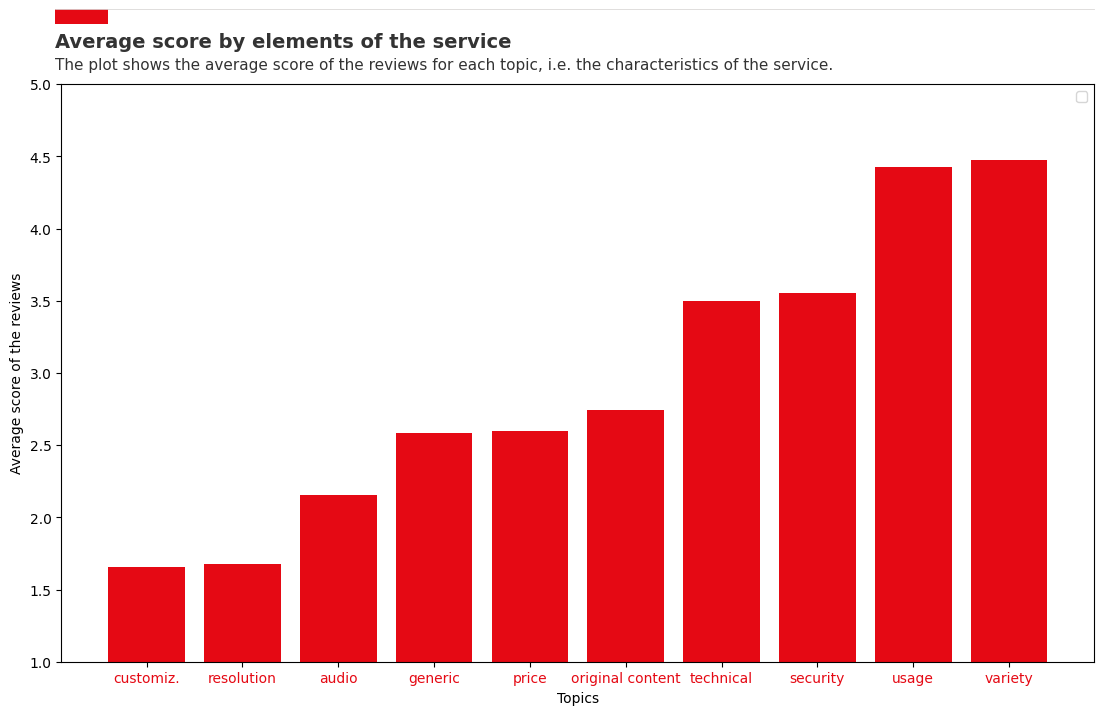

In [ ]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# create the line graph
y_pos = np.arange(len(aggregated_reviews2.index))
plt.bar(y_pos, aggregated_reviews2.values, color='#E50914')
plt.xticks(y_pos, aggregated_reviews2.index, color='#E50914')
# Create the grid 
ax.set_ylim(1, 5)
# set the title, legend, and axis labels
plt.xlabel('Topics')
plt.ylabel('Average score of the reviews')
plt.legend()
ax.text(x=0.12, y=0.93, s='Average score by elements of the service', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The plot shows the average score of the reviews for each topic, i.e. the characteristics of the service.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E50914', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#DAD8D7', linewidth=.6)

# display the graph
plt.show()